### 688002 睿创微纳

##### 加权平均净资产收益率
| 2019 | 2018 |
| ---- | ---- |
| 12.79% | 27.61% |

##### 2020-11-07
* 科创板，2019年7月上市


In [1]:
ticker = '688002'

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils

In [4]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = data.get_market(ticker)
bs = data.get_BS(ticker)

In [5]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.4928,0.4928,"684,656,331 (78.2%)","489,678,932 (90.2%)","202,065,860 (61.4%)"
2018-12-31,0.3725,0.3725,"384,104,725 (146.7%)","257,414,768 (130.1%)","125,168,101 (94.5%)"
2017-12-31,0.2326,0.2326,"155,722,300 (158.5%)","111,881,300 (82.6%)","64,350,900 (563.9%)"
2016-12-31,0.0379,0.0379,"60,250,600 (nan%)","61,286,100 (nan%)","9,693,300 (nan%)"


In [6]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-06-30,"462,441,026 (201.2%)","223,349,456 (438.8%)"
2020-03-31,"230,744,132 (129.5%)","85,030,723 (265.9%)"
2019-12-31,"282,413,677 (33.5%)","100,902,794 (20.7%)"
2019-09-30,"148,198,492 (162.6%)","36,473,118 (242.1%)"
2019-06-30,"153,519,041 (92.5%)","41,449,339 (44.9%)"
2019-03-31,"100,525,121 (177.1%)","23,240,609 (605.8%)"
2018-12-31,"211,621,314 (-44.9%)","83,607,289 (-46.5%)"
2018-09-30,"56,440,825 (nan%)","10,662,255 (nan%)"
2018-06-30,"79,759,384 (nan%)","28,610,381 (nan%)"


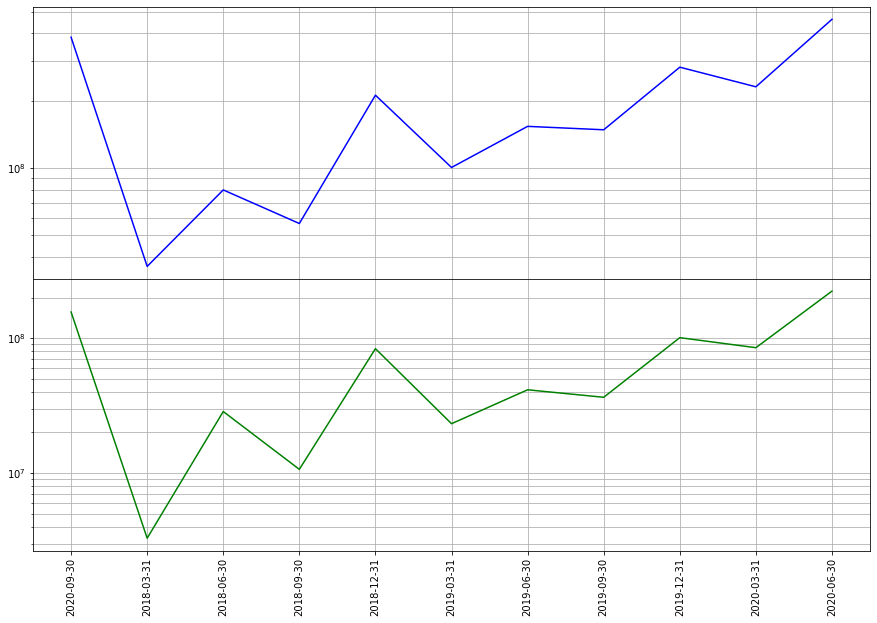

In [7]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,50.4,29.5
2018-12-31,60.1,32.6
2017-12-31,66.6,41.3
2016-12-31,67.3,16.1


In [9]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"684,656,331 (78.2%)","294,398,028 (19.5%)","74,969,426 (-10.3%)","114,805,748 (32.6%)"
2018-12-31,"384,104,725 (146.7%)","246,396,682 (75.0%)","83,604,694 (389.0%)","86,565,120 (35.0%)"
2017-12-31,"155,722,300 (158.5%)","140,762,100 (128.7%)","17,098,800 (73.4%)","64,117,500 (157.8%)"
2016-12-31,"60,250,600 (nan%)","61,556,200 (nan%)","9,862,800 (nan%)","24,868,400 (nan%)"


In [10]:
mkt['前复权'] = mkt['收盘价'] * mkt['累积前复权因子']
mkt['前复权'] = mkt['前复权'].round(2)
mkt['滚动市盈率'] = mkt['滚动市盈率'].round(1)
df = mkt[['收盘价', '滚动市盈率', '前复权']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('收盘价', 'min'), ('收盘价', 'max'), ('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])

收盘价        滚动市盈率           前复权         前复权增长
      first   last   min    max  first   last       
交易日期                                                
2019  50.20  38.09  74.5  203.3  50.15  38.05  -24.1
2020  38.97  81.98  61.4  134.9  38.93  81.98  110.6